In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv("/content/yadhava.csv")
print(data)

            db                           full_path  age  gender
0      UTKface  part1/41_0_2_20170105164126307.jpg   41       1
1      UTKface  part1/80_1_0_20170110122217473.jpg   80       0
2      UTKface  part1/56_0_0_20170111202842202.jpg   56       1
3      UTKface  part1/82_1_0_20170110141329969.jpg   82       0
4      UTKface  part1/16_1_4_20170102234841875.jpg   16       0
...        ...                                 ...  ...     ...
24099  UTKface  part3/31_1_3_20170119200101732.jpg   31       0
24100  UTKface  part3/24_1_1_20170116225255798.jpg   24       0
24101  UTKface  part3/39_0_3_20170119203757237.jpg   39       1
24102  UTKface  part3/44_1_3_20170119192758593.jpg   44       0
24103  UTKface  part3/78_1_0_20170120224727472.jpg   78       0

[24104 rows x 4 columns]


In [ ]:
data.head()


,db,full_path,age,gender
0,UTKface,part1/41_0_2_20170105164126307.jpg,41,1
1,UTKface,part1/80_1_0_20170110122217473.jpg,80,0
2,UTKface,part1/56_0_0_20170111202842202.jpg,56,1
3,UTKface,part1/82_1_0_20170110141329969.jpg,82,0
4,UTKface,part1/16_1_4_20170102234841875.jpg,16,0


In [ ]:
X=data.loc[:,["age"]]
y=data["gender"]
new=pd.DataFrame(X,y)
new

,age
gender,
1,80
0,41
1,80
0,41
0,41
...,...
0,41
0,41
1,80


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf=GaussianNB()


# New Section

In [ ]:
clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.59095623314665


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.53      0.55      2264
           1       0.61      0.64      0.62      2557

    accuracy                           0.59      4821
   macro avg       0.59      0.59      0.59      4821
weighted avg       0.59      0.59      0.59      4821



In [ ]:
false_percentage = (1 - accuracy) * 100
print("False Percentage:", false_percentage)

False Percentage: 40.904376685334995


In [ ]:
new=pd.DataFrame(X_test,y_pred)
print(new)

    age
0   NaN
0   NaN
0   NaN
1   NaN
1   NaN
..  ...
1   NaN
1   NaN
0   NaN
0   NaN
0   NaN

[4821 rows x 1 columns]


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1207, 1057],
       [ 915, 1642]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

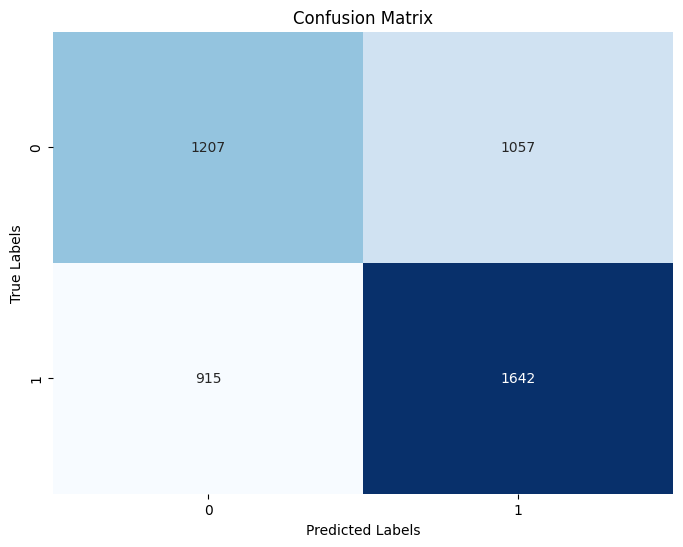

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
